<h1 style="font-size:350%;text-align:center;border-radius: 50px 50px;padding: 15px;color:black;">Urban Sound Classification using Deep Learning</h1>

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import librosa.display
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.callbacks import Callback,EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Conv2D, Activation, Flatten, Dense,GlobalAveragePooling2D, Dropout

import warnings 
warnings.filterwarnings("ignore") 
warnings.warn("this will not show")


In [ ]:
C:\Users\44778\Desktop\Koc Holding Camp

In [20]:
path_ = "C:\\Users\\44778\\Desktop\\Koc Holding Camp"

In [22]:
path_csv = path_+"\\"+'UrbanSound8K.csv'
data = pd.read_csv(path_csv)
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


In [24]:
data.describe()

,fsID,start,end,salience,fold,classID
count,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000
mean,116033.493816,38.645409,42.253312,1.347000,5.385937,4.592877
std,57991.017218,74.292126,74.369669,0.476043,2.846820,2.894544
min,344.000000,0.000000,0.105962,1.000000,1.000000,0.000000
25%,69942.250000,3.000000,6.839398,1.000000,3.000000,2.000000
50%,118279.000000,10.376492,14.000000,1.000000,5.000000,4.000000
75%,166942.000000,35.131372,38.866979,2.000000,8.000000,7.000000
max,209992.000000,600.125356,604.125356,2.000000,10.000000,9.000000


In [25]:
data.isnull().sum()

slice_file_name    0
fsID               0
start              0
end                0
salience           0
fold               0
classID            0
class              0
dtype: int64

In [ ]:
# data['file_path'] = path_+ "\\"+ "spectrograms"+ "\\"+'fold'+data.fold.astype(str)+'\\'+data['slice_file_name']
# data.head()

In [84]:
data['file_path'] = path_+ "\\"+ "UrbanSound8K"+ "\\"+ "audio"+ "\\"'fold'+ data.fold.astype(str)+'\\'+data['slice_file_name']
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class,file_path
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark,C:\Users\44778\Desktop\Koc Holding Camp\UrbanS...
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing,C:\Users\44778\Desktop\Koc Holding Camp\UrbanS...
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing,C:\Users\44778\Desktop\Koc Holding Camp\UrbanS...
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing,C:\Users\44778\Desktop\Koc Holding Camp\UrbanS...
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing,C:\Users\44778\Desktop\Koc Holding Camp\UrbanS...


In [85]:
df = data[['file_path','class']]
df.head()

,file_path,class
0,C:\Users\44778\Desktop\Koc Holding Camp\UrbanS...,dog_bark
1,C:\Users\44778\Desktop\Koc Holding Camp\UrbanS...,children_playing
2,C:\Users\44778\Desktop\Koc Holding Camp\UrbanS...,children_playing
3,C:\Users\44778\Desktop\Koc Holding Camp\UrbanS...,children_playing
4,C:\Users\44778\Desktop\Koc Holding Camp\UrbanS...,children_playing


In [86]:
data.file_path[0]

'C:\\Users\\44778\\Desktop\\Koc Holding Camp\\UrbanSound8K\\audio\\fold5\\100032-3-0-0.wav'

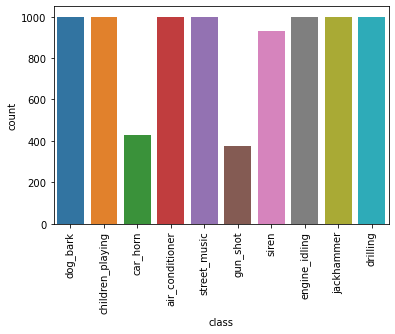

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [87]:
sns.countplot(x='class', data=df)
plt.xticks(rotation=90);
plt.show()
df['class'].value_counts()

In [88]:
df.columns

Index(['file_path', 'class'], dtype='object')

In [89]:
#'C:\\Users\\44778\\Desktop\\Koc Holding Campfold5\\100032-3-0-0.wav'


In [90]:
df.file_path[1]

'C:\\Users\\44778\\Desktop\\Koc Holding Camp\\UrbanSound8K\\audio\\fold5\\100263-2-0-117.wav'

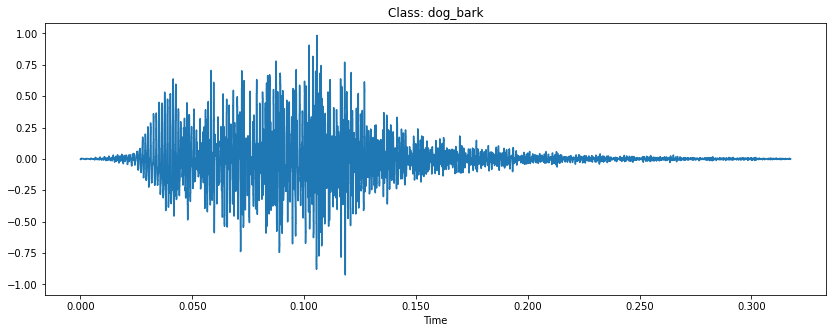

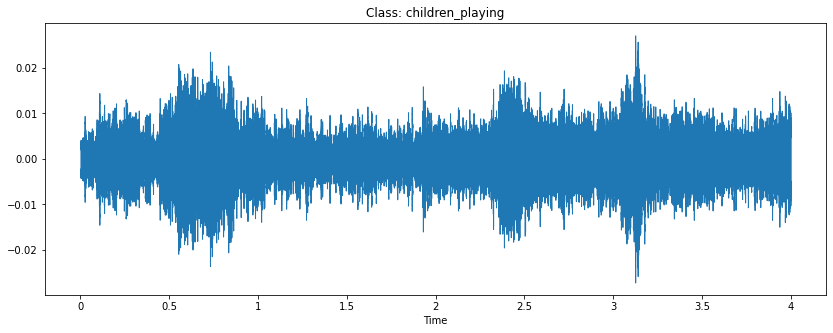

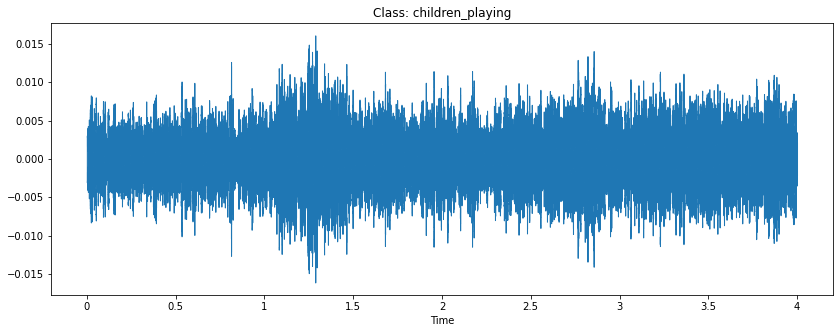

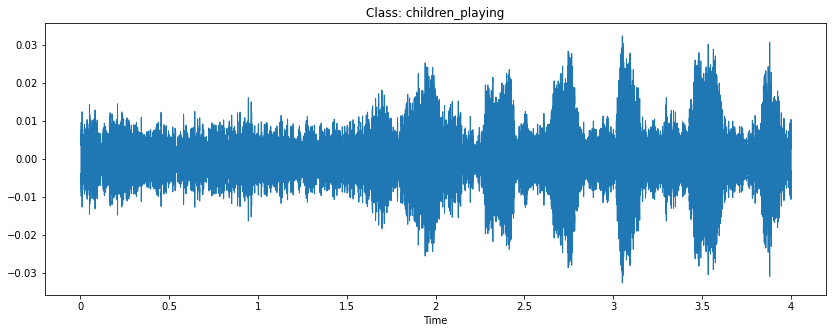

In [91]:
for i in range(4):
    x, sr = librosa.load(df.file_path[i])
    plt.figure(figsize=(14,5))
    plt.title('Class: '+str(df['class'][i]))
    librosa.display.waveshow(x, sr=sr)

In [93]:
# from scipy.io import wavfile as wav
# import IPython.display as ipd
# ipd.Audio('../input/urbansound8k/fold5/100263-2-0-117.wav')

In [94]:
def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_processed = np.mean(mfccs.T,axis=0)
    return mfccs_processed

In [97]:
features = []
for index, row in df.iterrows():
    file_name = str(row['file_path'])
    
    class_label = row["class"]
    data = extract_features(file_name)
    
    features.append([data, class_label])  

In [98]:
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

In [99]:
featuresdf.head()

,feature,class_label
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [100]:
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

In [101]:
X.shape, y.shape

((8732, 40), (8732,))

In [102]:
le = LabelEncoder()
y = to_categorical(le.fit_transform(y))

In [103]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [104]:
x_train.shape[1]

40

In [105]:
model = Sequential()
model.add(Dense(64, input_dim=40,  activation='relu'))
model.add(Dense(46, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2624      
                                                                 
 dense_1 (Dense)             (None, 46)                2990      
                                                                 
 dropout (Dropout)           (None, 46)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                940       
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
Total params: 6,764
Trainable params: 6,764
Non-trainable params: 0
_________________________________________________________________


In [106]:
earlystop = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')

In [107]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[earlystop], epochs=50)

Epoch 1/50
219/219 [==============================] - 2s 2ms/step - loss: 4.3037 - accuracy: 0.1261 - val_loss: 2.1975 - val_accuracy: 0.1832
Epoch 2/50
219/219 [==============================] - 0s 1ms/step - loss: 2.2469 - accuracy: 0.1900 - val_loss: 2.0558 - val_accuracy: 0.2124
Epoch 3/50
219/219 [==============================] - 0s 1ms/step - loss: 2.0888 - accuracy: 0.2292 - val_loss: 1.9330 - val_accuracy: 0.2873
Epoch 4/50
219/219 [==============================] - 0s 1ms/step - loss: 2.0051 - accuracy: 0.2697 - val_loss: 1.8368 - val_accuracy: 0.3337
Epoch 5/50
219/219 [==============================] - 0s 1ms/step - loss: 1.9148 - accuracy: 0.3074 - val_loss: 1.7094 - val_accuracy: 0.4007
Epoch 6/50
219/219 [==============================] - 0s 1ms/step - loss: 1.8144 - accuracy: 0.3538 - val_loss: 1.6410 - val_accuracy: 0.4167
Epoch 7/50
219/219 [==============================] - 0s 1ms/step - loss: 1.7258 - accuracy: 0.3857 - val_loss: 1.5696 - val_accuracy: 0.4499
Epoch 

In [108]:
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

In [109]:
print("Training Accuracy: %.2f%%" % accuracy)

Training Accuracy: 72.47%


In [110]:
# Evaluating The Model
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy:\033[01m {0:.2%}\033[0m".format(score[1]))
score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy:\033[01m {0:.2%}\033[0m".format(score[1]))

Training Accuracy: 74.19%
Testing Accuracy: 72.47%


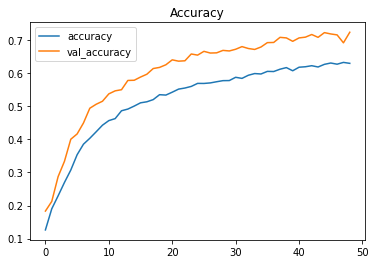

In [111]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

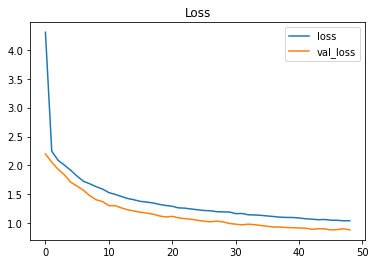

In [112]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [113]:
def prediction_(path_sound):
    data_sound = extract_features(path_sound)
    X = np.array(data_sound)
    X = X.reshape(1,40)
    pred_ = model.predict(X)
    pred_ = np.argmax(pred_,axis=1)
    pred_class = le.inverse_transform(pred_)
    print("The predicted class is:\033[01m ", pred_class[0],'\033[0m \n')

In [ ]:
'C:\\Users\\44778\\Desktop\\Koc Holding Camp\\UrbanSound8K\\audio\\fold5\\100263-2-0-117.wav'


In [120]:
pwd

'C:\\Users\\44778\\Desktop\\Koc Holding Camp'

In [132]:
import os

In [136]:
os.chdir("UrbanSound8K/")

FileNotFoundError: [WinError 3] The system cannot find the path specified: '\\UrbanSound8K\\audio\\fold5'

In [126]:
#'\\UrbanSound8K\\audio\\fold5\\100263-2-0-117.wav'


In [131]:
path_sound = "\\UrbanSound8K/\audio\\fold5\\100263-2-0-117.wav"
prediction_(path_sound)
ipd.Audio(path_sound)

FileNotFoundError: [Errno 2] No such file or directory: '\\UrbanSound8K\\audio\\fold5\\100263-2-0-117.wav'

In [31]:
path_sound = '../input/urbansound8k/fold8/106905-5-0-0.wav'
prediction_(path_sound)
ipd.Audio(path_sound)

The predicted class is:  children_playing  



In [32]:
path_sound = '../input/urbansound8k/fold1/103074-7-1-0.wav'
prediction_(path_sound)
ipd.Audio(path_sound)

The predicted class is:  jackhammer  

